In [3]:
import sys

import numpy as np
import scipy.io
from scipy.spatial.distance import pdist
from scipy.interpolate import griddata
import time
import sklearn
from sklearn.cluster import KMeans
import scipy
import scipy.stats as stats
import scipy.special

from itertools import product

In [136]:
nmods = 3
numsamples = 100
betas = [np.random.beta(1,10,size=[2000]) for k in range(nmods)]
log_betas = [np.log(betas[k]) for k in range(nmods)]
log_betas_minus = [np.log(1-betas[k]) for k in range(nmods)]
log_omegas = [log_betas[k] + np.insert(np.cumsum(log_betas_minus[k])[:-1],0,0) for k in range(nmods)]
omegas = [np.exp(log_omegas[k]) for k in range(nmods)]
samples = [np.random.choice(range(2000), p = omegas[k],size = 2000) for k in range(nmods)]
    
    

In [22]:
def tensor_sparse_stick(alpha): 
    nmods=3
    Wstar =[np.random.gamma(alpha) for k in range(3)]
    N = np.maximum(np.random.poisson(np.prod(Wstar)),1)
    
    betas = [np.random.beta(1,alpha,size=[2000]) for k in range(nmods)]
    log_betas = [np.log(betas[k]) for k in range(nmods)]
    log_betas_minus = [np.log(1-betas[k]) for k in range(nmods)]
    log_omegas = [log_betas[k] + np.insert(np.cumsum(log_betas_minus[k])[:-1],0,0) for k in range(nmods)]
    omegas = [np.exp(log_omegas[k]) for k in range(nmods)]
    
    samples = [np.random.choice(range(2000), p = omegas[k],size = 2000) for k in range(nmods)]
    entries = np.unique(np.vstack(samples).T,axis=0)
    
    size = np.prod([np.unique(entries[:,k]).shape[0] for k in range(3)])
    return entries.shape[0], size, 

In [44]:
def gen_sparse_stick(alpha):
    nmods=3
    Wstar =[np.random.gamma(alpha) for k in range(3)]
    N = np.maximum(np.random.poisson(np.prod(Wstar)),1)
    
    betas = [np.random.beta(1,alpha,size=[2000]) for k in range(nmods)]
    log_betas = [np.log(betas[k]) for k in range(nmods)]
    log_betas_minus = [np.log(1-betas[k]) for k in range(nmods)]
    log_omegas = [log_betas[k] + np.insert(np.cumsum(log_betas_minus[k])[:-1],0,0) for k in range(nmods)]
    omegas = [np.exp(log_omegas[k]) for k in range(nmods)]
    
    samples = [np.random.choice(range(2000), p = omegas[k],size = 2000) for k in range(nmods)]
    entries = np.unique(np.vstack(samples).T,axis=0)
    return entries

In [49]:
def tensor_sparse_trial2(alpha):
    entries = np.unique(np.vstack([np.array(gen_sparse_stick(alpha)),np.array(gen_sparse_stick(alpha))
                                   ,np.array(gen_sparse_stick(alpha))]),axis=0)
    size = np.prod([np.unique(entries[:,k]).shape[0] for k in range(3)])
    
    return entries.shape[0],size

In [50]:
tensor_sparse_stick(6)

(976, 43050)

In [61]:
averages = []
for alpha in [2,3,3.5,4.5,5,5.5,6,6.5,7,7.5,8,8.5,8.75,9,9.1,9.2]:
    print(alpha)
    results = []
    for i in range(200):
        results.append(tensor_sparse_stick(alpha))
    results = np.mean(results,axis=0)
    averages.append(results)
averages = np.array(averages) 

2
3
3.5
4.5
5
5.5
6
6.5
7
7.5
8
8.5
8.75
9
9.1
9.2


In [66]:
averages = []
for alpha in [1,1.5,2.5,3,3.5,4.5,5,5.5,6,6.5,7]:
    print(alpha)
    results = []
    for i in range(200):
        results.append(tensor_sparse_trial2(alpha))
    results = np.mean(results,axis=0)
    averages.append(results)
averages = np.array(averages) 

1
1.5
2.5
3
3.5
4.5
5
5.5
6
6.5
7


In [67]:
import matplotlib.pyplot as plt

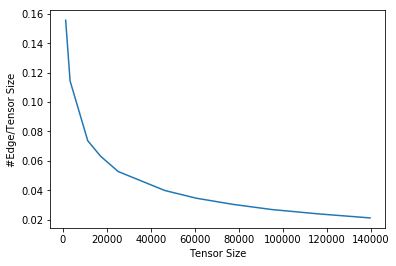

In [71]:
plt.plot(averages[:,1],averages[:,0]/averages[:,1],label= 'ours')
#plt.plot(averages2[:,1],averages2[:,0]/averages2[:,1],label= 'ours')
#plt.plot(averages,)
#plt.plot(cp_nodes**3,average_cp/cp_nodes**3)
plt.xlabel("Tensor Size")
plt.ylabel("#Edge/Tensor Size")
plt.show()

In [69]:
averages[:,0]/averages[:,1]

array([0.15563992, 0.11435753, 0.07368249, 0.06315034, 0.05268409,
       0.0397881 , 0.03455156, 0.03033025, 0.02681436, 0.02390171,
       0.02111986])

In [70]:
averages[:,1]

array([  1259.06 ,   3266.51 ,  11291.15 ,  17106.955,  25137.475,
        46334.075,  60578.745,  77383.31 ,  95058.57 , 115899.05 ,
       139645.785])